# Audio corruptions example

Imports & Definintion of necessary functions

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import librosa, os, shutil
import IPython.display as ipd
import soundfile as sf

def get_spectrogram(audio_path):
    audio_data, sample_rate = librosa.load(audio_path, sr=None)
    spectrogram = np.abs(librosa.stft(audio_data))

    # Display spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.amplitude_to_db(spectrogram, ref=np.max), sr=sample_rate, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.show()


## Load an audio from the IEMOCAP dataset

In [5]:
iemocap_audio_file_path = "../../datasets/iemocap/Session5/sentences/wav/Ses05F_script01_1/Ses05F_script01_1_F022.wav"
shutil.copy(iemocap_audio_file_path, "iemocap_audio.wav")
iemocap_audio_file_path = "iemocap_audio.wav"

audio_data, sample_rate = librosa.load(iemocap_audio_file_path, sr=None)

ipd.Audio(iemocap_audio_file_path)

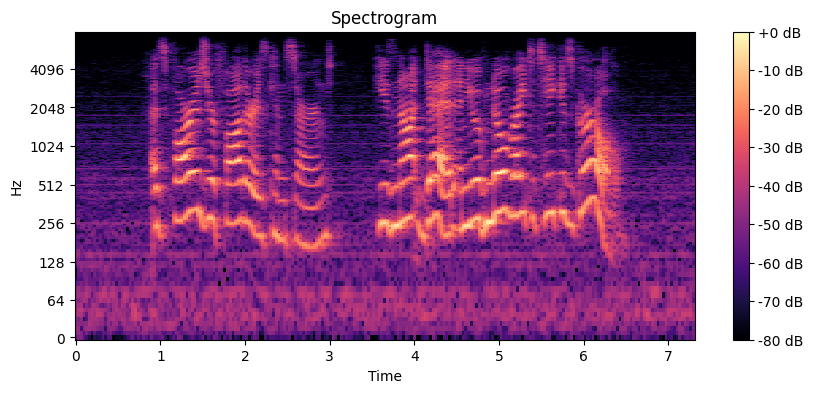

In [6]:
get_spectrogram(iemocap_audio_file_path)

### Add Gaussian SNR

In [10]:
from gaussian import AWGNAugmentation

output_file_path = "gaussian_10.wav"
if os.path.exists(output_file_path):
    os.remove(output_file_path)

config = {
    'snr': 10,
}

gaussian_10 = AWGNAugmentation(config)
corrupted_audio, corruption_type = gaussian_10.run(audio_data, sample_rate)

sf.write(output_file_path, corrupted_audio, sample_rate)
ipd.Audio(output_file_path)

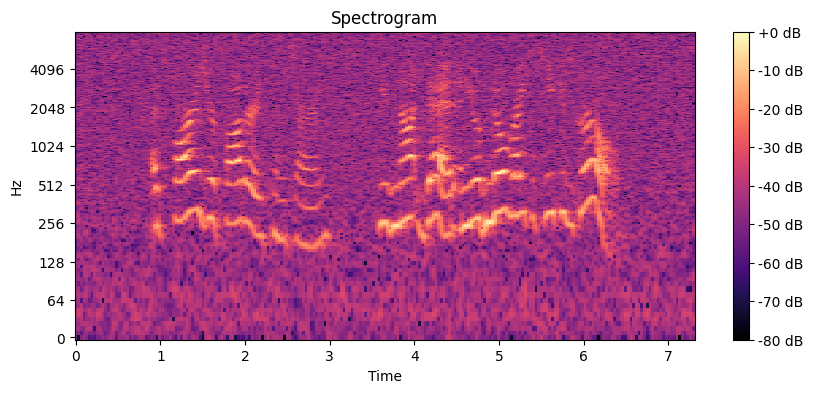

In [11]:
get_spectrogram(output_file_path)

### Add clipping distortion

In [13]:
from clipping_distortion import AddClippingDistortion

output_file_path = "clipping_40.wav"
if os.path.exists(output_file_path):
    os.remove(output_file_path)

config = {
    'max_percentile_threshold': 40,
}

clipping_40 = AddClippingDistortion(config)
corrupted_audio, corruption_type = clipping_40.run(audio_data, sample_rate)

sf.write(output_file_path, corrupted_audio, sample_rate)
ipd.Audio(output_file_path)

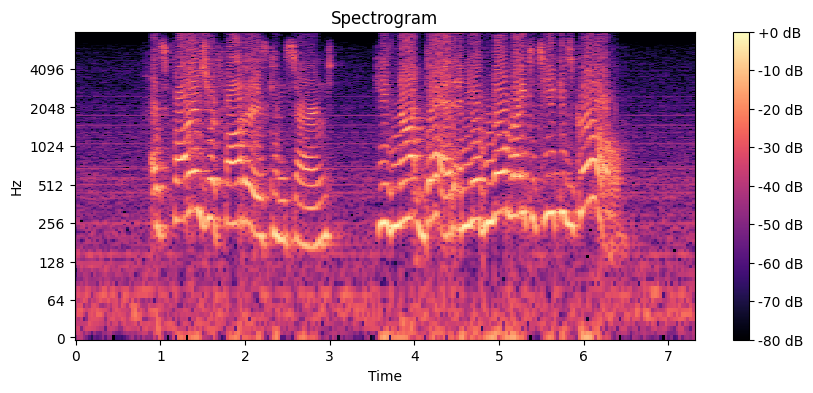

In [14]:
get_spectrogram(output_file_path)

### Compress audio

In [15]:
from compression import Compression

output_file_path = "compression_8.wav"
if os.path.exists(output_file_path):
    os.remove(output_file_path)

config = {
    'bit_rate': 8,
}

compression_8 = Compression(config)
compression_8.run(iemocap_audio_file_path, sample_rate, output_file_path)

ipd.Audio(output_file_path)

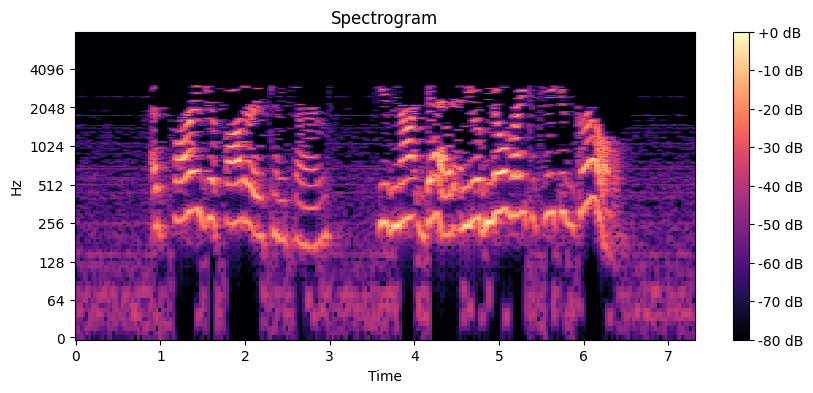

In [16]:
get_spectrogram(output_file_path)

### Add gain_transition

In [21]:
from gain_transition import AddGainTransition

output_file_path = "gain_transition_30_10.wav"
if os.path.exists(output_file_path):
    os.remove(output_file_path)

config = {
    'min_max_gain_db': [-30.0, -10.0]
}

gain_transition_30_10 = AddGainTransition(config)
corrupted_audio, corruption_type = gain_transition_30_10.run(audio_data, sample_rate)

sf.write(output_file_path, corrupted_audio, sample_rate)
ipd.Audio(output_file_path)

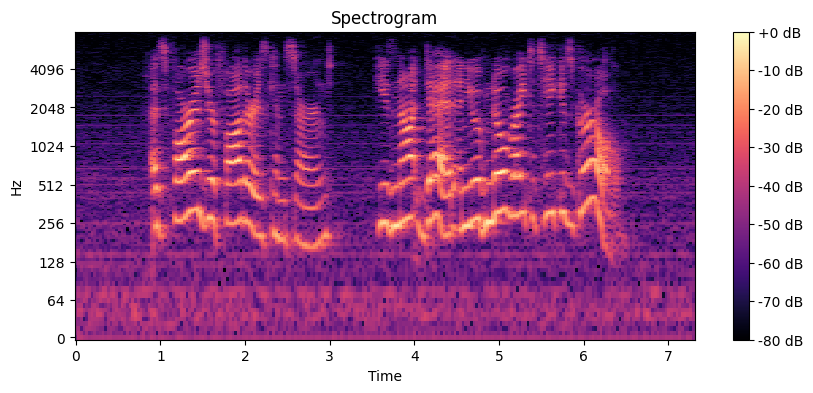

In [23]:
get_spectrogram(output_file_path)

### Add reverberation

In [29]:
from impulse_response import AddImpulseResponse
import warnings

warnings.filterwarnings("ignore")
output_file_path = "reverb_underground_01_05.wav"
if os.path.exists(output_file_path):
    os.remove(output_file_path)

config = {
    'ir_path': "../../datasets/EchoThiefImpulseResponseLibrary/Underground",
    'rt60_range': [0.1, 0.5],
}

reverberation_01_05 = AddImpulseResponse(config)
corrupted_audio, corruption_type = reverberation_01_05.run(audio_data, sample_rate)

sf.write(output_file_path, corrupted_audio, sample_rate)
ipd.Audio(output_file_path)


Selected 1 impulse responses from ../../datasets/EchoThiefImpulseResponseLibrary/Underground with RT60 in range [0.1, 0.5]


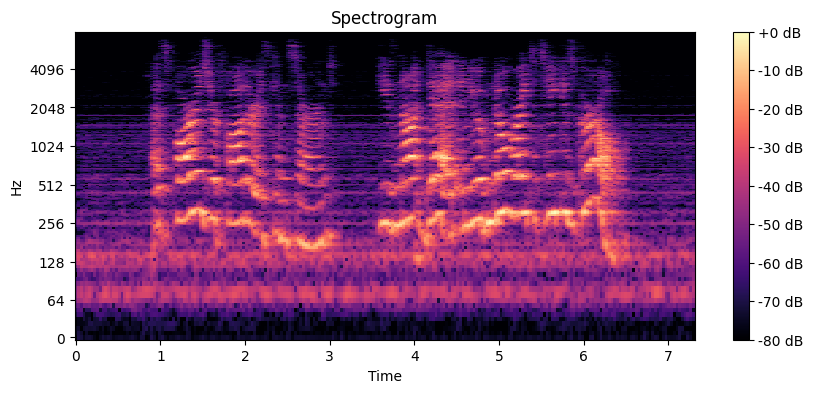

In [30]:
get_spectrogram(output_file_path)

### Add background noise from ESC50 dataset (0dB)

In [34]:
from content import ContentCorruption

output_file_path = "esc_augment_0_db.wav"
if os.path.exists(output_file_path):
    os.remove(output_file_path)

config = {
    'content_dataset_path': '../../datasets/ESC-50-master',
    'snr': 0
}

esc_augment_0_db = ContentCorruption(config)
corrupted_audio, corruption_type = esc_augment_0_db.run(audio_data, sample_rate)

print(f"Corruption file: {corruption_type}")

sf.write(output_file_path, corrupted_audio, sample_rate)
ipd.Audio(output_file_path)

Corruption file: 4-154793-A-4.wav


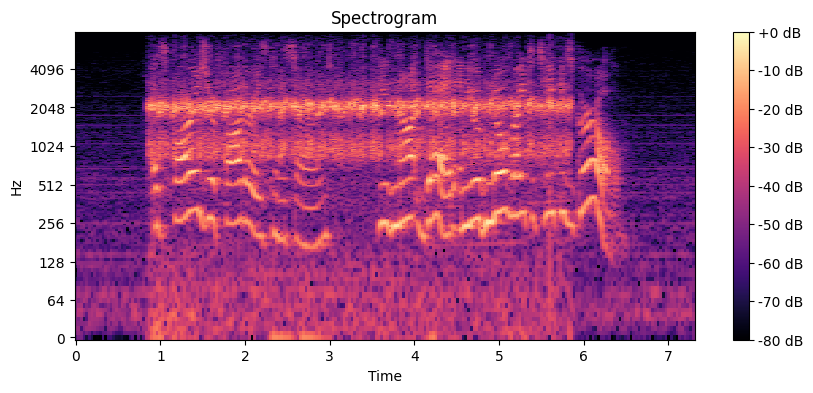

In [35]:
get_spectrogram(output_file_path)

### Add background noise from MUSAN (10dB)

In [31]:
from content import ContentCorruption

output_file_path = "musan_augment_10_db.wav"
if os.path.exists(output_file_path):
    os.remove(output_file_path)

config = {
    'content_dataset_path': '../../datasets/musan',
    'snr': 10
}

musan_augment_10_db = ContentCorruption(config)
corrupted_audio, corruption_type = musan_augment_10_db.run(audio_data, sample_rate)

print(f"Corruption file: {corruption_type}")

sf.write(output_file_path, corrupted_audio, sample_rate)
ipd.Audio(output_file_path)

Corruption file: noise-free-sound-0629.wav


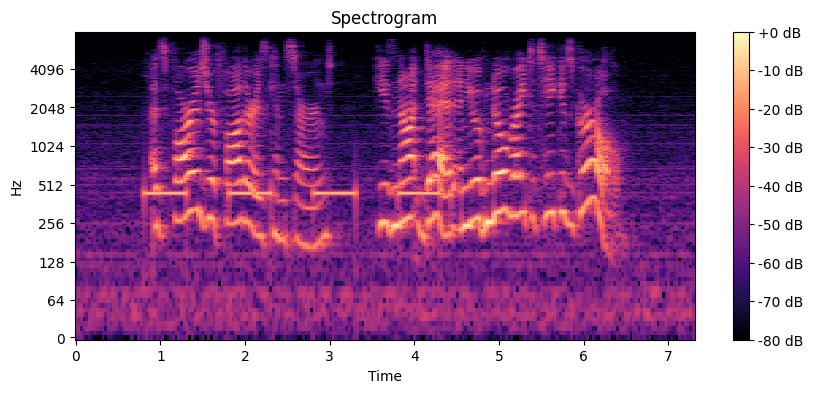

In [32]:
get_spectrogram(output_file_path)

### Add background noise from urbansound8k (20dB)

In [27]:
from content import ContentCorruption

output_file_path = "urban_augment_20_db.wav"
if os.path.exists(output_file_path):
    os.remove(output_file_path)

config = {
    'content_dataset_path': '../../datasets/urbansound8k',
    'snr': 20
}

urban_augment_20_db = ContentCorruption(config)
corrupted_audio, corruption_type = urban_augment_20_db.run(audio_data, sample_rate)

print(f"Corruption file: {corruption_type}")

sf.write(output_file_path, corrupted_audio, sample_rate)
ipd.Audio(output_file_path)

Corruption file: 129356-2-0-118.wav


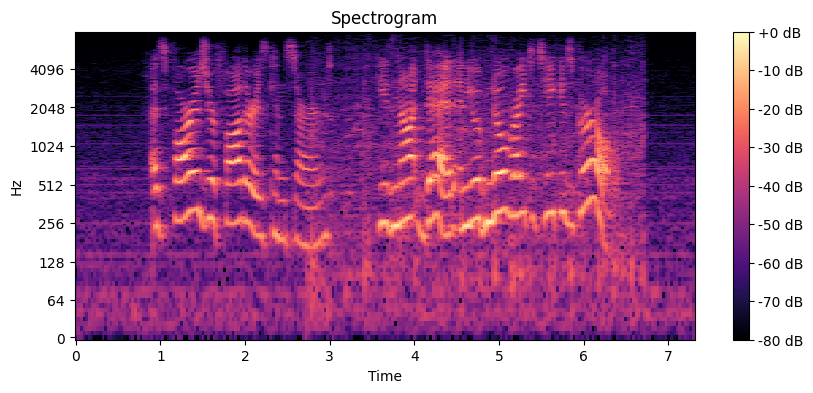

In [28]:
get_spectrogram(output_file_path)